<a href="https://colab.research.google.com/github/wk1219/Keras/blob/master/%5B%EC%9D%B4%EC%99%95%EA%B7%9C%5D_hw03_imdb_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터셋 준비 
IMDB에서 제공하는 영화 리뷰 데이터셋 이용

## IMDB 데이터셋

--> 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만 개. 
<br>훈련 데이터 25000개, 테스트 데이터 25000개로 나뉘고 각각 50%는 부정, 50%는 긍정 리뷰로 구성됨.

## 1. 데이터셋 생성

훈련 데이터 25000개를 훈련 데이터 20000개, 검증 데이터 5000개로 분리 

분리 후 리뷰의 길이를 맞춰주기 위해 sequence를 사용하여 padding으로 0을 채워주거나 단어 길이의 최대값이 넘어가지 않도록 잘라내어 조정함.

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Flatten
import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)
np.load = np_load_old

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

## 2. 모델 구성
순환 신경망 모델 구성
<br>순환 신경망(RNN) : 시퀀스 모델, 입력과 출력을 시퀀스로 처리하는 모델이며,  시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태에 저장.

In [11]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(CuDNNLSTM(128))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,692,225
Trainable params: 2,692,225
Non-trainable params: 0
_________________________________________________________________
None


## 3. 모델 학습과정 설정


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. 모델 학습

In [8]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 6s 299us/step - loss: 0.4862 - acc: 0.7624 - val_loss: 0.4350 - val_acc: 0.8058
Epoch 2/25
20000/20000 [==============================] - 5s 267us/step - loss: 0.2606 - acc: 0.8972 - val_loss: 0.3431 - val_acc: 0.8546
Epoch 3/25
20000/20000 [==============================] - 5s 261us/step - loss: 0.1521 - acc: 0.9455 - val_loss: 0.3903 - val_acc: 0.8548
Epoch 4/25
20000/20000 [==============================] - 5s 262us/step - loss: 0.0947 - acc: 0.9669 - val_loss: 0.5068 - val_acc: 0.8718
Epoch 5/25
20000/20000 [==============================] - 5s 261us/step - loss: 0.0660 - acc: 0.9790 - val_loss: 0.4741 - val_acc: 0.8518
Epoch 6/25
20000/20000 [==============================] - 5s 261us/step - loss: 0.0507 - acc: 0.9825 - val_loss: 0.6943 - val_acc: 0.8472
Epoch 7/25
20000/20000 [==============================] - 5s 260us/step - loss: 0.0366 - acc: 0.9890 - val_loss: 0.5589 - v

## 5. 학습과정 보기

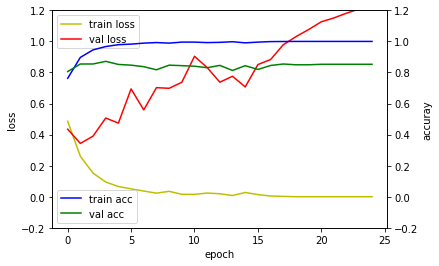

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


## 6. 모델 평가

In [10]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,692,225
Trainable params: 2,692,225
Non-trainable params: 0
_________________________________________________________________
None
25000/25000 [==============================] - 3s 108us/step
## evaluation loss and_metrics ##
[1.3269836223602296, 0.8439999999809266]
